In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
# Creating a virtual GPU. Got the code block from the Tensorflow documentation
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [32]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1) Building an Image classifier using the Sequential API

In [5]:
# Loading the fashion_mnist dataset from keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
# Splitting into train and validation set
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Initializing the model

In [24]:
# Initialize the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [25]:
# To get the model's summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# To get the different layers in the model
model.layers

In [27]:
# The dense layers are randomly initialized to break the symmetry
# Biases are initialized with zero
# To use different initialization method, can use 
#"kernel_initializer"(kernel is another name for matrix of connection weights) or bias_initializer
weights, biases = model.layers[1].get_weights()

In [28]:
weights

array([[-0.03282255,  0.05624321, -0.0464827 , ..., -0.01037037,
        -0.00518335,  0.07352825],
       [ 0.04484316,  0.06611127, -0.04108194, ..., -0.03105582,
         0.06027539,  0.07296595],
       [ 0.00157899, -0.0011799 , -0.01182091, ...,  0.06228502,
         0.07086916, -0.04869295],
       ...,
       [-0.07148506, -0.02661597,  0.05018748, ..., -0.06174666,
         0.00039884,  0.05631761],
       [-0.05360314,  0.06346595,  0.04073659, ..., -0.02524466,
         0.01260746, -0.04492055],
       [-0.00306334, -0.03413533, -0.06105193, ..., -0.02490833,
        -0.04513054,  0.01090122]], dtype=float32)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Compiling the model

In [30]:
# Compile the model
# For the explanation of this loss function and when to use which loss function,
# Refer the book "Hands-on Machine Learning", pg-no: 302
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [31]:
y_train.shape

(55000,)

### Training and evaluating the model

In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7170 - accuracy: 0.7674 - val_loss: 0.5382 - val_accuracy: 0.8146
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4854 - accuracy: 0.8317 - val_loss: 0.4570 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4399 - accuracy: 0.8468 - val_loss: 0.4123 - val_accuracy: 0.8608
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4140 - accuracy: 0.8551 - val_loss: 0.4060 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3941 - accuracy: 0.8628 - val_loss: 0.3761 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3779 - accuracy: 0.8673 - val_loss: 0.3783 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3638 - accuracy: 0.8721 - val_loss: 0.3699 - val_accuracy:

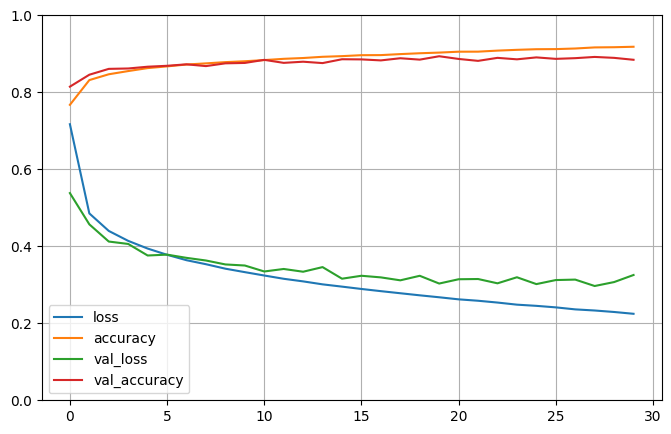

In [33]:
# Learning curves: The mean training loss and the accuracy measured over each epoch
# And the mean validation loss and the accuracy measured at the end of each epoch

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [34]:
# Evaluating the model on test cases
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 736us/step - loss: 93.2612 - accuracy: 0.8107


[93.26118469238281, 0.810699999332428]

### Predicting the classes

In [35]:
# Predicting for the new cases
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 33ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## 2) Building a Regression MLP using the Sequential API

- The code from here on will contain "loss:nan val_loss:nan" error during training because the dataset that was used in the book and the dataset used here are different

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Loading the dataset

In [6]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [7]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
fetch_housing_data()

In [8]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [9]:
housing = load_housing_data()
housing.drop(["ocean_proximity", "total_bedrooms"], axis = 1, inplace = True) # Removing ocean_proximity because
                                # it is of object type, total_bedrooms because it has missing values
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0


In [10]:
# Splitting the dataset into train, test and validation sets

X = housing.drop("median_house_value", axis = 1)
y = housing["median_house_value"]
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [11]:
# Scale the inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
# Initialize the model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = "mean_squared_error", optimizer = "sgd")

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


2023-06-25 05:54:20.568278: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-25 05:54:20.737349: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f5f6baeb1d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-25 05:54:20.737361: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2023-06-25 05:54:20.915262: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700
2023-06-25 05:54:21.112054: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


363/363 [==============================] - 4s 852us/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 696us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 700us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 657us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 663us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 723us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 710us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 633us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 646us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 689us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [=============================

- The above "loss:nan - val_loss: nan" might be because the dataset I use is different from the one what is used in the book. When I tried using the dataset as described in the book, it throwed 403: Firbiiden error. So, tried downloading separately but there seems to be some issues with the data.
- Apparently, the dataset used in the book is much simpler

In [13]:
# Evaluate and predict
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 30ms/step


## 3) Building Complex models using the Functional API

In [14]:
# Model 1
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model1 = keras.Model(inputs = [input_], outputs = [output])

In [15]:
# Model 2 with 2 inputs
input_A = keras.layers.Input(shape=[5], name = "wide_input")
input_B = keras.layers.Input(shape=[5], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model2 = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [16]:
# Model 3 with 2 outputs
input_A = keras.layers.Input(shape=[5], name = "wide_input")
input_B = keras.layers.Input(shape=[5], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
model3 = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

### Using the Model 2

In [21]:
# Using the Model 2
model2.compile(loss="mse", optimizer = keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [22]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           180         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                            

In [23]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462


In [24]:
# Train the model
history = model2.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model2.evaluate((X_test_A, X_test_B), y_test)
y_pred = model2.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 892us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 846us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 856us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 889us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 887us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 892us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 944us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 914us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 897us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [====================

- The above "loss:nan - val_loss: nan" error is because I use a different dataset and the data might be incompatible.

### Using the model 3

In [26]:
model3.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = "sgd")
history = model3.fit([X_train_A, X_train_B], [y_train, y_train], epochs = 20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

train_loss, main_loss, aux_loss = model3.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred, y_pred_aux = model3.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 9062356992.0000 - output_loss: 8580033536.0000 - aux_output_loss: 13403333632.0000 - val_loss: 9406796800.0000 - val_output_loss: 8988808192.0000 - val_aux_output_loss: 13168672768.0000
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 8936317952.0000 - output_loss: 8439979520.0000 - aux_output_loss: 13403384832.0000 - val_loss: 9359664128.0000 - val_output_loss: 8936346624.0000 - val_aux_output_loss: 13169556480.0000
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 8879163392.0000 - output_loss: 8376488960.0000 - aux_output_loss: 13403277312.0000 - val_loss: 9442499584.0000 - val_output_loss: 9028302848.0000 - val_aux_output_loss: 13170265088.0000
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 8860975104.0000 - output_loss: 8356288512.0000 - aux_output_loss: 13403177984.0000 - val_loss: 9361753088.0000 - val_output_loss: 8938419200.0000 

## 4) Using the subclassing API to Build Dynamic Models

In [27]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

- In the above example, we are subclassing the Model class. Creating the layers we need in the constructor and using them to perform the computation in the call()
- The big difference is that we can do pretty much anything we want in the call() method: for loops, if statements, ;ow-level tensorflow operations. This makes it a great API for researchers experimenting with new ideas.

## 5) Saving the model

In [29]:
# Saving the model
model = keras.models.Sequential([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")

# Reloading the saved model
model = keras.models.load_model("my_keras_model.h5")

- Saving the model will work when using Sequential API or Functional API but not when using the Subclassing the model.
- We can use save_weights(), load_weights() as an workaround atleast to save the model parameters

## 6) Using Callbacks

- What if trainging lasts several hours or days?
- In that case, we should not only save our model at the end of each training, but also save checkpoints at regular intervals during training to avoid losing evrything if our computer crashes.
- But how do we tell the fit() method to save the checkpoints? Answer: Use callbacks

In [ ]:
# First build and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

In [ ]:
# When using validation sets, we can store the best model on validation set using "save_best_only=True"
# The following code is a simple way to implement early stopping

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5")

In [ ]:
# Another way of implementing the early stopping
# Will interrupt training when it measures no progress on the validation set for a number of epochs(patience argument)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
# We can write own custom callbacks
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))

- We can implement the custom callbacks on: 
- on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), batch, test, test_batch(called by evaluate()), predict, predict_batch(called by predict())

## 7) Using TensorBoard for visualization

- Tensorboard is a great interactive visualization toll that we can use to view the learning curves during training, compare learning curve between multiple runs, and so on.
- It's a great tool to keep in hand
- There are instructions on how to start the server and how exaxtly to use it in the book and we can also refer in the internet.
- So, go through it again when the tool is in need for any project.

## 8) Fine-Tuning Neural Network Hyperparameters

In [36]:
# Function that will build and compile a Keras model, given a set of hyperparameters
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[7]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

To know, why we do this way to use the randomizedsearchcv, refer the book at pg_no: 320-323

In [43]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_test)

In [42]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons":np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

- Evolutionary algorithms are used to search the hyperparameter space

**What is an evolutionary algorithm?**

An evolutionary algorithm is an evolutionary AI-based computer application that solves problems by employing processes that mimic the behaviors of living things. As such, it uses mechanisms that are typically associated with biological evolution, such as reproduction, mutation, and recombination. 

Evolutionary algorithms function in a Darwinian-like natural selection process; the weakest solutions are eliminated while stronger, more viable options are retained and re-evaluated in the next evolution—with the goal being to arrive at optimal actions to achieve the desired outcomes.
